In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Si es notebook, mejor usar:
BASE_DIR = Path.cwd()

# Ir un nivel arriba (de notebooks → raíz del repo)
ROOT = BASE_DIR.parent

# Carpeta data dentro del repo
DATA_DIR = ROOT / "data"
DATA_DIR.mkdir(exist_ok=True)

In [3]:
df_det = pd.read_csv(DATA_DIR / "2022-2026" / "detalle.csv")
df_det.head(3)

,id,descripcion,fecha,total_si,total_no,total_abstencion,total_dispensado,quorum__value_1,quorum_valor,resultado__value_1,resultado_valor,tipo__value_1,tipo_valor,diputado_id,diputado_nombre,diputado_apellido_paterno,diputado_apellido_materno,opcion_voto__value_1,opcion_voto_valor,tipo_iniciativa
0,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,1,Proyecto de Ley,1,1096.0,María Candelaria,Acevedo,Sáez,Afirmativo,1.0,Proyecto de ley
1,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,1,Proyecto de Ley,1,1098.0,Yovana,Ahumada,Palma,Afirmativo,1.0,Proyecto de ley
2,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,1,Proyecto de Ley,1,1009.0,Jorge,Alessandri,Vergara,Afirmativo,1.0,Proyecto de ley


In [4]:
df_det = df_det[df_det["tipo_iniciativa"] == "Proyecto de ley"]
df_det["boletin"] = df_det["descripcion"].astype(str).str.extract(r"Bolet[ií]n\s*N[°º]?\s*(\d+)-\d+")
df_det.head(3)

,id,descripcion,fecha,total_si,total_no,total_abstencion,total_dispensado,quorum__value_1,quorum_valor,resultado__value_1,...,tipo__value_1,tipo_valor,diputado_id,diputado_nombre,diputado_apellido_paterno,diputado_apellido_materno,opcion_voto__value_1,opcion_voto_valor,tipo_iniciativa,boletin
0,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Proyecto de Ley,1,1096.0,María Candelaria,Acevedo,Sáez,Afirmativo,1.0,Proyecto de ley,15557
1,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Proyecto de Ley,1,1098.0,Yovana,Ahumada,Palma,Afirmativo,1.0,Proyecto de ley,15557
2,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Proyecto de Ley,1,1009.0,Jorge,Alessandri,Vergara,Afirmativo,1.0,Proyecto de ley,15557


In [5]:
df_boletines = pd.read_csv(DATA_DIR / "2022-2026" / "boletines.csv")
df_boletines.head(3)

,boletin,titulo,camara_origen,fecha_ingreso,ley,estado,ambitos
0,15557,Otorga reajuste de remuneraciones a las y los ...,C.Diputados,12/12/2022,Ley N° 21.526,Publicado,"['Trabajo y Previsión', 'Economía y Hacienda']"
1,14683,Modifica la Ley General de Urbanismo y Constru...,C.Diputados,04/11/2021,NaN,En tramitación,['no cumple']
2,15222,Modifica las leyes orgánicas constitucionales ...,C.Diputados,22/07/2022,NaN,En tramitación,['no cumple']


In [6]:
df_det["boletin"] = df_det["boletin"].astype(str).str.strip()
df_boletines["boletin"] = df_boletines["boletin"].astype(str).str.strip()
df_det = df_det.merge(
    df_boletines,
    on="boletin",
    how="left"
)
df_det.head(3)

,id,descripcion,fecha,total_si,total_no,total_abstencion,total_dispensado,quorum__value_1,quorum_valor,resultado__value_1,...,opcion_voto__value_1,opcion_voto_valor,tipo_iniciativa,boletin,titulo,camara_origen,fecha_ingreso,ley,estado,ambitos
0,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Afirmativo,1.0,Proyecto de ley,15557,Otorga reajuste de remuneraciones a las y los ...,C.Diputados,12/12/2022,Ley N° 21.526,Publicado,"['Trabajo y Previsión', 'Economía y Hacienda']"
1,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Afirmativo,1.0,Proyecto de ley,15557,Otorga reajuste de remuneraciones a las y los ...,C.Diputados,12/12/2022,Ley N° 21.526,Publicado,"['Trabajo y Previsión', 'Economía y Hacienda']"
2,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Afirmativo,1.0,Proyecto de ley,15557,Otorga reajuste de remuneraciones a las y los ...,C.Diputados,12/12/2022,Ley N° 21.526,Publicado,"['Trabajo y Previsión', 'Economía y Hacienda']"


In [7]:
df_bio = pd.read_csv(DATA_DIR / "2022-2026" / "diputados_bio.csv")
df_bio

,periodo_id,Periodo,diputado_id,nombre_completo,fecha_nacimiento,sexo,edad,distrito_numero,partido_id,partido_nombre,...,padre,madre,estado_civil,numero_total_hijos,colegios,universidad,carrera,maximo_nivel_educativo,trabajo,carrera:
0,10,2022-2026,1165,Agustín Romero Leiva,1975-01-03,Masculino,47,NaN,PREP,Partido Republicano,...,Agustín Romero Pizarro,Adelita Leiva Silva,NaN,2.0,['Liceo Alemán de Santiago'],Universidad Gabriela Mistral,Derecho,Educación Universitaria,['Abogado en Consorcio Frebag S.A. (2001‑2003)...,NaN
1,10,2022-2026,1179,Alberto Undurraga Vicuña,1969-06-17,Masculino,52,NaN,DC,Partido Demócrata Cristiano,...,NaN,NaN,Casado,4.0,"['Colegio Lirima de Iquique', 'Princess Anne H...",Universidad Adolfo Ibáñez,Derecho,Magíster,['Fiscal Regional (Metropolitana) de la Fiscal...,NaN
2,10,2022-2026,1160,Alejandra Placencia Cabello,1978-02-14,Femenino,44,NaN,PC,Partido Comunista,...,Richard Hernán Cariola Carrasco,Eduviges del Carmen Oliva Sepúlveda,NaN,1.0,['Liceo Tajamar de Providencia'],Universidad de Concepción,Obstetricia y Puericultura,Educación Universitaria,['voluntaria en un hospital de la Zona Oriente...,NaN
3,10,2022-2026,1013,Alejandro Bernales Maldonado,1979-02-02,Masculino,43,NaN,LIBERAL,Partido Liberal de Chile,...,César Soto Henríquez,Trinidad Ferrada Sarmiento,Casado,2.0,"['Escuela Municipal Nº 5 de San Bernardo', 'Li...",Universidad de Chile,Derecho,Educación Universitaria,['Colaborador en la Corporación de Promoción y...,NaN
4,10,2022-2026,1076,Alexis Sepúlveda Soto,1969-12-29,Masculino,52,NaN,PR,Partido Radical de Chile,...,Leonidas Romero Valenzuela,Delfina Noemí Sáez Valenzuela,Casado,1.0,"['Colegio San Juan (Lota)', 'Liceo Antonio Sal...",Instituto Profesional Diego Portales,Técnico de Nivel Superior en Administración de...,Educación Universitaria,['Comerciante en ferretería y venta de maderas'],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,10,2022-2026,991,Vlado Mirosevic Verdugo,1987-05-23,Masculino,34,NaN,LIBERAL,Partido Liberal de Chile,...,Juan Luis Camaño Ulloa,Patricia Eugenia Cárdenas Sandoval,soltero,NaN,['Colegio Cholguán'],"Universidad San Sebastián, sede Concepción",Arquitecto,Educación Universitaria,[],NaN
153,10,2022-2026,1158,Víctor Alejandro Pino Fuentes,1974-12-08,Masculino,47,NaN,IND,Independientes,...,Héctor Felipe Donoso Barros,Jimena Carola Castro Arévalo,Casado,NaN,['Colegio de la Salle de la comuna de Talca'],Universidad Gabriela Mistral,Ciencias Jurídicas y Sociales,Educación Universitaria,['Administrador Financiero en Agrícola Santa T...,NaN
154,10,2022-2026,1059,Ximena Ossandón Irarrázabal,1963-12-13,Femenino,58,NaN,RN,Renovación Nacional,...,Héctor Fernando Bórquez Tirachini,Amalia del Carmen Montecinos Orellana,Casado,2.0,['Liceo B N°34 Galvarino Riveros Cárdenas de C...,NaN,NaN,Enseñanza Media,[],NaN
155,10,2022-2026,1098,Yovana Ahumada Palma,1973-02-24,Femenino,49,NaN,IND,Independientes,...,Armando Weisse Fuentealba,Mireya Elvira Novoa Insunza,NaN,NaN,['Liceo N° 1 de Niñas de Concepción'],NaN,NaN,Enseñanza Media,[],NaN


In [8]:
import unicodedata

def normalize_text(s):
    if pd.isna(s):
        return ""
    # elimina tildes, pasa a minúsculas y quita dobles espacios
    s = str(s).strip().lower()
    s = ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))
    s = ' '.join(s.split())
    return s

# en df_det
df_det["nombre_completo"] = (
    df_det["diputado_nombre"].fillna('') + " " +
    df_det["diputado_apellido_paterno"].fillna('') + " " +
    df_det["diputado_apellido_materno"].fillna('')
).apply(normalize_text)

# en df_bio
df_bio["nombre_completo"] = df_bio["nombre_completo"].apply(normalize_text)

In [9]:
intersect = set(df_det["nombre_completo"]) & set(df_bio["nombre_completo"])
print(f"Coincidencias exactas de nombre: {len(intersect)} / {df_det['nombre_completo'].nunique()}")

Coincidencias exactas de nombre: 157 / 247


In [10]:
def custom_merge(voto_row):
    diputado_id = voto_row["diputado_id"]
    fecha_voto  = voto_row["fecha"]

    militancias = df_bio[df_bio["diputado_id"] == diputado_id]
    mask = (militancias["Militancia.FechaInicio"] <= fecha_voto) & \
           (fecha_voto <= militancias["Militancia.FechaTermino"])

    if mask.any():
        militancia_row = militancias[mask].iloc[0]

        militancia_clean = militancia_row.drop(labels=["diputado_id"], errors="ignore")
        merged = pd.concat([voto_row, militancia_clean])

        return merged
    return None

In [11]:
from tqdm import tqdm

merged_rows = []
no_match_rows = [] 

for _, voto in tqdm(df_det.iterrows(), total=len(df_det), desc="Procesando votos"):
    result = custom_merge(voto)
    if result is not None:
        merged_rows.append(result)
    else:
        no_match_rows.append(voto)

Procesando votos: 100%|███████████████████████████████████████████████████████| 497683/497683 [09:48<00:00, 845.27it/s]


In [12]:
df_merged = pd.DataFrame([s.to_dict() for s in merged_rows])
df_merged.head(3)

,id,descripcion,fecha,total_si,total_no,total_abstencion,total_dispensado,quorum__value_1,quorum_valor,resultado__value_1,...,padre,madre,estado_civil,numero_total_hijos,colegios,universidad,carrera,maximo_nivel_educativo,trabajo,carrera:
0,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Manouchehr Manouchehri Moghadam Kashan,María Lobos Inzunza,Divorciado,2.0,['Colegio Bernardo O´Higgins'],"['Universidad Diego Portales', 'Universidad de...",Ciencias Jurídicas,Magíster,"['Comunicación estratégica y social media', 'E...",NaN
1,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Víctor Mix Fortín,Eliana Jiménez Caviedes,soltera,2.0,"['Escuela Carmela Larraín de Infante', 'Liceo ...",Universidad Academia de Humanismos Cristiano,Trabajo Social,Educación Universitaria,['Práctica profesional en la Fundación de Ayud...,NaN
2,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,Juan Francisco Undurraga Mackenna,María Tereza Gazitúa Costabal,Casado,3.0,['Colegio San Ignacio del Bosque'],NaN,Publicidad,Educación Universitaria,"['Productor de Radio Chilena (1988)', 'Ejecuti...",NaN


In [13]:
mineduc = pd.read_csv(
    DATA_DIR / "colegios chile.csv",
    sep=";",              # el Mineduc casi siempre usa punto y coma
    encoding="latin-1",   # evita problemas con tildes y ñ
    on_bad_lines="skip",  # salta filas con errores
    engine="python"       # más tolerante que el parser por defecto
)

mineduc.head()

,ï»¿AGNO,RBD,DGV_RBD,NOM_RBD,MRUN,RUT_SOSTENEDOR,P_JURIDICA,COD_REG_RBD,NOM_REG_RBD_A,COD_PRO_RBD,...,ESPE_02,ESPE_03,ESPE_04,ESPE_05,ESPE_06,ESPE_07,ESPE_08,ESPE_09,ESPE_10,ESPE_11
0,2024,1,9,LICEO POLITECNICO ARICA,,62000660,1,15,AYP,151,...,52009,52010,52013,53014,53015,61002,61003,62004,64001,81004
1,2024,2,7,PARVULARIO LAS ESPIGUITAS,,62000660,1,15,AYP,151,...,0,0,0,0,0,0,0,0,0,0
2,2024,3,5,ESC. PEDRO VICENTE GUTIERREZ TORRES,,62000660,1,15,AYP,151,...,0,0,0,0,0,0,0,0,0,0
3,2024,4,3,LICEO OCTAVIO PALMA PEREZ,,62000660,1,15,AYP,151,...,0,0,0,0,0,0,0,0,0,0
4,2024,5,1,JOVINA NARANJO FERNANDEZ,,62000660,1,15,AYP,151,...,0,0,0,0,0,0,0,0,0,0


In [14]:
import ast
df_merged["colegios"] = df_merged["colegios"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
df_merged["colegio_egreso"] = df_merged["colegios"].apply(lambda x: x[-1] if isinstance(x, list) and len(x) > 0 else None)

In [15]:
# Asegúrate de que 'colegio_egreso' esté normalizado
df_unique = (
    df_merged[["colegio_egreso"]]
    .drop_duplicates()
    .dropna()
    .reset_index(drop=True)
)

print("Colegios únicos:", len(df_unique))

Colegios únicos: 144


In [16]:
import re

def normalizar(nombre):
    if not isinstance(nombre, str):
        return ""
    nombre = nombre.lower()
    reemplazos = str.maketrans("áéíóúüñ", "aeiouun")
    nombre = nombre.translate(reemplazos)
    nombre = re.sub(r"[^a-z0-9\s]", "", nombre)
    nombre = re.sub(r"\s+", " ", nombre).strip()
    return nombre

df_unique["colegio_norm"] = df_unique["colegio_egreso"].apply(normalizar)
mineduc["nom_norm"] = mineduc["NOM_RBD"].apply(normalizar)

In [17]:
!pip install rapidfuzz -U

from rapidfuzz import process, fuzz
from tqdm.notebook import tqdm
tqdm.pandas()

nombres_mineduc = mineduc["nom_norm"].tolist()

def buscar_dependencia(nombre):
    if not isinstance(nombre, str) or nombre.strip() == "":
        return None, 0, None
    result = process.extractOne(nombre, nombres_mineduc, scorer=fuzz.WRatio)
    if result:
        match, score, idx = result
        dep = mineduc.iloc[idx]["COD_DEPE"]
        return match, score, dep
    return None, 0, None

df_unique[["match_fuzzy", "score", "dependencia_oficial"]] = df_unique["colegio_norm"].progress_apply(
    lambda x: pd.Series(buscar_dependencia(x))
)

  0%|          | 0/144 [00:00<?, ?it/s]

In [18]:
print("Colegios:", len(df_unique))
print("Score ≥ 90:", len(df_unique[df_unique["score"] >= 90]))
print("Entre 70 y 89:", len(df_unique[(df_unique["score"] >= 70) & (df_unique["score"] < 90)]))
print("Score promedio:", round(df_unique["score"].mean(), 2))

Colegios: 144
Score ≥ 90: 108
Entre 70 y 89: 35
Score promedio: 93.03


In [19]:
# Normaliza también en el df original para el join
df_merged["colegio_norm"] = df_merged["colegio_egreso"].apply(normalizar)

# Merge exacto por nombre normalizado
df_final = df_merged.merge(
    df_unique[["colegio_norm", "dependencia_oficial", "score"]],
    on="colegio_norm",
    how="left"
)

In [20]:
# Nuevo mapeo simplificado
map_dependencia_simple = {
    1: "Público",
    2: "Público",
    5: "Público",
    6: "Público",
    3: "Particular Subvencionado",
    4: "Privado"
}

# Aplicar el nuevo mapeo
df_final["dependencia_simple"] = df_final["dependencia_oficial"].map(map_dependencia_simple)

In [21]:
to_drop = ['carrera:', 'colegio_egreso', 'colegio_norm', 'dependencia_oficial',
       'score_y', 'colegios', 'fecha_nacimiento.1', 'padre', 'madre', 'nombre_norm', 'nombre_match_norm',
       'score_x', 'status', 'familia_juventud_parrafos', 'biografia_completa', 'estudios_vida_laboral_parrafos',
          'distrito_numero', 'ley']

df_final.drop(columns=to_drop, inplace=True)

In [22]:
# Mapeo de reemplazos
fill_values = {
    "lugar_nacimiento": "No informado",
    "estado_civil": "No informado",
    "universidad": "No informado",
    "carrera": "No informado",
    "maximo_nivel_educativo": "No informado",
    "dependencia_simple": "No informado"
}

# Aplicar reemplazos
df_final = df_final.fillna(value=fill_values)

In [23]:
def normalizar_estado_civil(valor):
    if pd.isna(valor):
        return None

    valor = valor.strip().lower()

    # Simplificar variantes de "casado"
    if "casad" in valor:
        return "Casado/a"

    # Solteros
    if "solter" in valor:
        return "Soltero/a"

    # Divorciados
    if "divorci" in valor:
        return "Divorciado/a"

    # Conviviente civil
    if "conviv" in valor:
        return "Conviviente civil"

    # Separados
    if "separ" in valor:
        return "Separado/a"

    # Viudos
    if "viud" in valor:
        return "Viudo/a"

    # Por defecto
    return "No informado"

In [24]:
df_final["estado_civil"] = df_final["estado_civil"].apply(normalizar_estado_civil)
df_final["estado_civil"].value_counts()

estado_civil
Casado/a             206792
No informado         122028
Soltero/a             35650
Divorciado/a          17032
Separado/a             3666
Viudo/a                2579
Conviviente civil       323
Name: count, dtype: int64

In [25]:
bins = [17, 24, 29, 34, 49, 120]
labels = [
    "Age 18–24",
    "Age 25–29",
    "Age 30–34",
    "Age 35–49",
    "Age 50+"
]

df_final["rango_etario"] = pd.cut(df_final["edad"], bins=bins, labels=labels, right=True)
df_final["rango_etario"].value_counts()

rango_etario
Age 35–49    164057
Age 50+      156620
Age 30–34     49005
Age 25–29     18388
Age 18–24         0
Name: count, dtype: int64

In [26]:
df_final.columns

Index(['id', 'descripcion', 'fecha', 'total_si', 'total_no',
       'total_abstencion', 'total_dispensado', 'quorum__value_1',
       'quorum_valor', 'resultado__value_1', 'resultado_valor',
       'tipo__value_1', 'tipo_valor', 'diputado_id', 'diputado_nombre',
       'diputado_apellido_paterno', 'diputado_apellido_materno',
       'opcion_voto__value_1', 'opcion_voto_valor', 'tipo_iniciativa',
       'boletin', 'titulo', 'camara_origen', 'fecha_ingreso', 'estado',
       'ambitos', 'nombre_completo', 'periodo_id', 'Periodo',
       'fecha_nacimiento', 'sexo', 'edad', 'partido_id', 'partido_nombre',
       'militancias_anteriores', 'Militancia.FechaInicio',
       'Militancia.FechaTermino', 'distrito', 'biografía_completa',
       'lugar_nacimiento', 'estado_civil', 'numero_total_hijos', 'universidad',
       'carrera', 'maximo_nivel_educativo', 'trabajo', 'dependencia_simple',
       'rango_etario'],
      dtype='object')

In [27]:
def strip_accents(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize("NFKD", s) if not unicodedata.combining(c))

def to_scalar_first_item(x):
    """Si viene como string de lista ['U1','U2'], toma el primero; si es lista, idem."""
    if isinstance(x, list) and x:
        return x[0]
    if isinstance(x, str) and x.strip().startswith('[') and x.strip().endswith(']'):
        try:
            lst = ast.literal_eval(x)
            if isinstance(lst, list) and lst:
                return lst[0]
        except Exception:
            pass
    return x

def normalize_universidad(raw):
    if pd.isna(raw): 
        return ""
    s = to_scalar_first_item(raw)
    s = str(s).strip()

    # Normalización básica (pero conservamos tokens como "de chile", "católica", etc.)
    s = strip_accents(s).lower()

    # Eliminar indicaciones de sede/campus y separadores ruidosos
    s = re.sub(r'\b(sede|campus)\b.*', '', s)              # corta desde "sede"/"campus" hacia adelante
    s = s.replace(';', ' ').replace(',', ' ').replace('–','-').replace('—','-')
    s = re.sub(r'\s+', ' ', s).strip()

    return s

# --- Mapeo por prioridad (chequeos ordenados, usando regexs) ---
# Nota: el orden importa. Pon primero los más específicos para evitar sobre-matcheos.
MAP_RULES = [
    (r'\bpontificia universidad catolica de chile\b|\b\bpuc\b|\bcatolica de chile\b', 
     'Pontificia Universidad Católica de Chile'),
    (r'\bpontificia universidad catolica de valparaiso\b|\bcatolica de valparaiso\b', 
     'Pontificia Universidad Católica de Valparaíso'),
    (r'\buniversidad de chile\b', 
     'Universidad de Chile'),
    (r'\buniversidad tecnica federico santa maria\b|\bfederico santa maria\b', 
     'Universidad Técnica Federico Santa María'),
    (r'\buniversidad de santiago de chile\b|\busach\b', 
     'Universidad de Santiago de Chile'),
    (r'\buniversidad de concepcion\b', 
     'Universidad de Concepción'),
    (r'\buniversidad austral de chile\b', 
     'Universidad Austral de Chile'),
    (r'\buniversidad catolica del norte\b', 
     'Universidad Católica del Norte'),
    (r'\buniversidad diego portales\b', 
     'Universidad Diego Portales'),
    (r'\buniversidad adolfo ibanez\b', 
     'Universidad Adolfo Ibáñez'),
    (r'\buniversidad andres bello\b|\buniversidad nacional andres bello\b', 
     'Universidad Andrés Bello'),
    (r'\buniversidad central de chile\b|\buniversidad central\b', 
      'Universidad Central de Chile'),
    (r'\buniversidad de talca\b', 
     'Universidad de Talca'),
    (r'\buniversidad de la serena\b', 
     'Universidad de La Serena'),
    (r'\buniversidad de valparaiso\b', 
     'Universidad de Valparaíso'),
    (r'\buniversidad de los lagos\b', 
     'Universidad de Los Lagos'),
    (r'\buniversidad catolica de la santisima concepcion\b', 
     'Universidad Católica de la Santísima Concepción'),
    (r'\buniversidad alberto hurtado\b', 
     'Universidad Alberto Hurtado'),
    (r'\buniversidad mayor\b', 
     'Universidad Mayor'),
    (r'\buniversidad san sebastian\b', 
     'Universidad San Sebastián'),
    (r'\buniversidad finis terrae\b', 
     'Universidad Finis Terrae'),
    (r'\buniversidad tecnologica metropolitana\b', 
     'Universidad Tecnológica Metropolitana'),
    (r'\binacap\b|\buniversidad tecnologica inacap\b', 
     'INACAP'),
    (r'\buniversidad complutense de madrid\b', 
     'Universidad Complutense de Madrid'),
    (r'\buniversidad de los andes \(chile\)\b|\buniversidad de los andes\b', 
     'Universidad de los Andes (Chile)'),
    (r'\buniversidad catolica\b(?!.*(valparaiso|chile))',  # "Universidad Católica" genérico
     'Pontificia Universidad Católica de Chile'),          # decide tu preferencia
]

def map_universidad(clean_s: str) -> str:
    if not clean_s:
        return "No informado"
    for patt, label in MAP_RULES:
        if re.search(patt, clean_s):
            return label
    # si no matchea ninguna regla, deja título capitalizado básico
    return "Otra / No informado"

# Aplicación
df_final["universidad_norm"] = df_final["universidad"].apply(normalize_universidad).apply(map_universidad)

In [28]:
df_final["universidad_norm"].value_counts()

universidad_norm
Otra / No informado                                121679
Universidad de Chile                                46667
Pontificia Universidad Católica de Chile            40686
Universidad de Concepción                           18822
Universidad Austral de Chile                        18617
Universidad Adolfo Ibáñez                           14128
Universidad Central de Chile                        13418
Universidad Andrés Bello                            10561
Universidad Diego Portales                          10485
Universidad Mayor                                    9585
Universidad de Los Lagos                             9355
Pontificia Universidad Católica de Valparaíso        9021
Universidad Técnica Federico Santa María             8780
Universidad Católica del Norte                       7207
Universidad de La Serena                             6514
Universidad San Sebastián                            6157
Universidad de Talca                                 56

In [29]:
def normalize_carrera(raw):
    if pd.isna(raw): 
        return ""
    s = to_scalar_first_item(raw)
    s = str(s).strip()
    s = strip_accents(s).lower()

    # eliminar títulos y palabras genéricas sin eliminar el núcleo
    s = re.sub(r"(licenciado|licenciatura|magister|doctor|titulo|tecnico|profesor(a)?|ingeniero(a)?|administrador(a)?|en|de|del|la|el|y|con|mencion)\b", " ", s)
    s = re.sub(r"[^a-záéíóúüñ\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()

    return s

In [30]:
MAP_CARRERAS = [
    (r'\bderech|juridic|abogad', 'Derecho'),
    (r'\bperiodism|periodista', 'Periodismo'),
    (r'\bingenieria comercial|ingenier[oa] comercial|comercial\b', 'Ingeniería Comercial'),
    (r'\bmedicin|medico cirujano|salud|doctor en medicina', 'Medicina'),
    (r'\badministracion publica|administrador publico', 'Administración Pública'),
    (r'\btrabajo social|asistente social|programas sociales', 'Trabajo Social'),
    (r'\barquitect', 'Arquitectura'),
    (r'\bpolitic|ciencias politicas|relaciones internacionales', 'Ciencia Política'),
    (r'\bodontolog', 'Odontología'),
    (r'\bpsicolog', 'Psicología'),
    (r'\bsociolog', 'Sociología'),
    (r'\bpedagog|educacion', 'Pedagogía'),
    (r'\benfermer', 'Enfermería'),
    (r'\bkinesiolog', 'Kinesiología'),
    (r'\bobstetric', 'Obstetricia y Puericultura'),
    (r'\bperiodism', 'Periodismo'),
    (r'\bcomunicacion|publicidad', 'Comunicación y Publicidad'),
    (r'\barte|diseno|musica|teatro|fotografia', 'Artes y Diseño'),
    (r'\bingenier', 'Ingeniería (General)'),
    (r'\bagroneg|agronom', 'Agronomía'),
    (r'\bquimic', 'Química'),
    (r'\bfisic', 'Física'),
    (r'\bmatematic', 'Matemática'),
    (r'\bbio', 'Biología / Biotecnología'),
    (r'\bhistoria|geografia', 'Historia y Geografía'),
    (r'\beconomia', 'Economía'),
    (r'\bderech', 'Derecho'),
    (r'\bcontad', 'Contador Auditor'),
    (r'\bcivil industrial|industrial', 'Ingeniería Civil Industrial'),
    (r'\binformat|computacion|sistemas', 'Ingeniería Informática / Computación'),
]
def map_carrera(clean_s: str) -> str:
    if not clean_s or clean_s.strip() == "":
        return "No informado"
    for patt, label in MAP_CARRERAS:
        if re.search(patt, clean_s):
            return label
    return "Otra"


In [31]:
df_final["carrera_clean"] = df_final["carrera"].apply(normalize_carrera)
df_final["carrera_norm"] = df_final["carrera_clean"].apply(map_carrera)

In [32]:
df_final["carrera_norm"].value_counts()

carrera_norm
Derecho                        122929
Otra                           109201
Ingeniería Comercial            30690
Periodismo                      19071
Medicina                        17006
Ingeniería (General)            12207
Administración Pública           9564
Pedagogía                        9364
Artes y Diseño                   9207
Trabajo Social                   9011
Arquitectura                     7542
Ciencia Política                 6968
Obstetricia y Puericultura       3639
Química                          3505
Ingeniería Civil Industrial      3397
Odontología                      3365
Psicología                       2827
Comunicación y Publicidad        2734
Historia y Geografía             1807
Contador Auditor                 1447
Kinesiología                     1410
Sociología                       1179
Name: count, dtype: int64

In [33]:
df_final["maximo_nivel_educativo"].value_counts()

maximo_nivel_educativo
Educación Universitaria    235909
Magíster                    96957
Enseñanza Media             45769
Doctor/a                     6144
No informado                 3291
Name: count, dtype: int64

In [34]:
df_final.columns

Index(['id', 'descripcion', 'fecha', 'total_si', 'total_no',
       'total_abstencion', 'total_dispensado', 'quorum__value_1',
       'quorum_valor', 'resultado__value_1', 'resultado_valor',
       'tipo__value_1', 'tipo_valor', 'diputado_id', 'diputado_nombre',
       'diputado_apellido_paterno', 'diputado_apellido_materno',
       'opcion_voto__value_1', 'opcion_voto_valor', 'tipo_iniciativa',
       'boletin', 'titulo', 'camara_origen', 'fecha_ingreso', 'estado',
       'ambitos', 'nombre_completo', 'periodo_id', 'Periodo',
       'fecha_nacimiento', 'sexo', 'edad', 'partido_id', 'partido_nombre',
       'militancias_anteriores', 'Militancia.FechaInicio',
       'Militancia.FechaTermino', 'distrito', 'biografía_completa',
       'lugar_nacimiento', 'estado_civil', 'numero_total_hijos', 'universidad',
       'carrera', 'maximo_nivel_educativo', 'trabajo', 'dependencia_simple',
       'rango_etario', 'universidad_norm', 'carrera_clean', 'carrera_norm'],
      dtype='object')

In [35]:
def normalize_lugar(raw):
    if pd.isna(raw):
        return ""
    s = str(raw).strip()
    s = strip_accents(s).lower()

    # quitar prefijos tipo "region de", "provincia de", etc.
    s = re.sub(r"(region|provincia|comuna|ciudad|localidad|departamento|municipio|villa|sector|prov)\s+de\s+", "", s)
    # eliminar descripciones extra
    s = re.sub(r"ex\s+oficina\s+salitrera\s+", "", s)
    # limpiar signos y espacios
    s = re.sub(r"[^a-záéíóúüñ\s,]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return s

MAP_LUGARES = [
    # --- Principales ciudades de Chile ---
    (r'\bsantiago( de chile)?\b', 'Santiago'),
    (r'\bvin(a|a del mar)\b', 'Viña del Mar'),
    (r'\bvaldivia\b', 'Valdivia'),
    (r'\bconcepcion\b', 'Concepción'),
    (r'\brancagua\b', 'Rancagua'),
    (r'\bpunta arenas\b', 'Punta Arenas'),
    (r'\btemuco\b', 'Temuco'),
    (r'\btalca\b', 'Talca'),
    (r'\bantofagasta\b', 'Antofagasta'),
    (r'\bcopiapo\b', 'Copiapó'),
    (r'\bchillan\b', 'Chillán'),
    (r'\bcurico\b', 'Curicó'),
    (r'\bcoquimbo\b', 'Coquimbo'),
    (r'\blota\b', 'Lota'),
    (r'\btalcahuano\b', 'Talcahuano'),
    (r'\bpuerto montt\b', 'Puerto Montt'),
    (r'\barica\b', 'Arica'),
    (r'\bcoyhaique\b', 'Coyhaique'),
    (r'\bosorno\b', 'Osorno'),
    (r'\bcuracautin\b', 'Curacautín'),
    (r'\bpuerto varas\b', 'Puerto Varas'),
    (r'\bovalle\b', 'Ovalle'),
    (r'\bvalparaiso\b', 'Valparaíso'),
    (r'\bmelipilla\b', 'Melipilla'),
    (r'\bmaipu\b', 'Maipú'),
    (r'\bsan fernando\b', 'San Fernando'),
    (r'\bsan antonio\b', 'San Antonio'),
    (r'\byumbel\b', 'Yumbel'),
    (r'\bcoronel\b', 'Coronel'),
    (r'\bcauquenes\b', 'Cauquenes'),
    (r'\blos angeles\b', 'Los Ángeles'),
    (r'\btraiguen\b', 'Traiguén'),
    (r'\bpaillaco\b', 'Paillaco'),
    (r'\byungay\b', 'Yungay'),
    (r'\barauco\b', 'Arauco'),
    (r'\bllanquihue\b', 'Llanquihue'),
    (r'\bnacimiento\b', 'Nacimiento'),

    # --- Extranjero ---
    (r'\bbuenos aires\b', 'Buenos Aires (Argentina)'),
    (r'\bchicago\b', 'Chicago (EE.UU.)'),
    (r'\bvien(a|a - hietzing)\b', 'Viena (Austria)'),
    (r'\bmalmo\b', 'Malmö (Suecia)'),
    (r'\bzurich\b', 'Zúrich (Suiza)'),
    (r'\bhuancahincul\b', 'Huancahincul (Argentina)'),

    # --- Otros casos ---
    (r'no informado', 'No informado'),
]


In [36]:
def map_lugar(s):
    if not s or s.strip() == "":
        return "No informado"
    for patt, label in MAP_LUGARES:
        if re.search(patt, s):
            return label
    # Si no hay match, intentamos dejar solo la primera palabra capitalizada
    return s.title()

def map_pais(lugar_norm):
    if any(pais in lugar_norm for pais in ["Argentina", "EE.UU", "Austria", "Suecia", "Suiza"]):
        if "Argentina" in lugar_norm:
            return "Argentina"
        elif "EE.UU" in lugar_norm:
            return "Estados Unidos"
        elif "Austria" in lugar_norm:
            return "Austria"
        elif "Suecia" in lugar_norm:
            return "Suecia"
        elif "Suiza" in lugar_norm:
            return "Suiza"
    # Por defecto, asumimos Chile
    return "Chile"


In [37]:
df_final["lugar_clean"] = df_final["lugar_nacimiento"].apply(normalize_lugar)
df_final["lugar_nacimiento_norm"] = df_final["lugar_clean"].apply(map_lugar)
df_final["pais_nacimiento"] = df_final["lugar_nacimiento_norm"].apply(map_pais)

In [38]:
df_final["lugar_nacimiento_norm"].value_counts()

lugar_nacimiento_norm
Santiago                    161613
Viña del Mar                 16703
Valdivia                     14451
Concepción                   13168
Rancagua                     11942
No informado                 10754
Punta Arenas                 10677
Temuco                        7171
Vallenar                      6763
Copiapó                       6626
Talca                         6491
Osorno                        5968
Antofagasta                   5400
Coyhaique                     4618
Puerto Montt                  4602
Los Andes                     4327
Arica                         4233
Chillán                       4104
Cauquenes                     3655
Chicago (EE.UU.)              3647
Coquimbo                      3578
Viena (Austria)               3521
Los Ángeles                   3456
Buenos Aires (Argentina)      3424
San Javier                    3399
Chimbarongo                   3309
Coronel                       3304
Huancahincul (Argentina)      329

In [39]:
REGION_MAP = {
    # Región de Arica y Parinacota
    "Arica": "Región de Arica y Parinacota",
    
    # Región de Tarapacá
    "Victoria, Iquique": "Región de Tarapacá",
    
    # Región de Antofagasta
    "Antofagasta": "Región de Antofagasta",
    
    # Región de Atacama
    "Copiapó": "Región de Atacama",
    "Vallenar": "Región de Atacama",
    "El Salvador, Atacama": "Región de Atacama",
    "Vallenar, Atacama": "Región de Atacama",
    
    # Región de Coquimbo
    "Coquimbo": "Región de Coquimbo",
    "Ovalle": "Región de Coquimbo",
    
    # Región de Valparaíso
    "Viña del Mar": "Región de Valparaíso",
    "Valparaíso": "Región de Valparaíso",
    "San Antonio": "Región de Valparaíso",
    
    # Región Metropolitana
    "Santiago": "Región Metropolitana de Santiago",
    "Santiago de Chile": "Región Metropolitana de Santiago",
    "Maipú, Santiago": "Región Metropolitana de Santiago",
    "San Bernardo, Santiago": "Región Metropolitana de Santiago",
    "Melipilla": "Región Metropolitana de Santiago",
    
    # Región de O’Higgins
    "Rancagua": "Región del Libertador General Bernardo O’Higgins",
    "San Fernando": "Región del Libertador General Bernardo O’Higgins",
    "Chimbarongo": "Región del Libertador General Bernardo O’Higgins",
    "San Vicente de Tagua Tagua": "Región del Libertador General Bernardo O’Higgins",
    
    # Región del Maule
    "Curicó": "Región del Maule",
    "Talca": "Región del Maule",
    "San Javier": "Región del Maule",
    "Longaví": "Región del Maule",
    "San Isidro, Longavi": "Región del Maule",
    
    # Región de Ñuble
    "Chillán": "Región de Ñuble",
    "Yungay": "Región de Ñuble",
    
    # Región del Biobío
    "Concepción": "Región del Biobío",
    "Talcahuano": "Región del Biobío",
    "Lota": "Región del Biobío",
    "Coronel": "Región del Biobío",
    "Los Ángeles": "Región del Biobío",
    "Cauquenes": "Región del Biobío",
    "Yumbel": "Región del Biobío",
    "Arauco": "Región del Biobío",
    
    # Región de La Araucanía
    "Temuco": "Región de La Araucanía",
    "Traiguén": "Región de La Araucanía",
    "Carahue": "Región de La Araucanía",
    "Curacautín": "Región de La Araucanía",
    "Nacimiento": "Región de La Araucanía",  # históricamente Biobío, pero dejamos posible cruce
    
    # Región de Los Ríos
    "Valdivia": "Región de Los Ríos",
    "Paillaco": "Región de Los Ríos",
    
    # Región de Los Lagos
    "Osorno": "Región de Los Lagos",
    "Llanquihue": "Región de Los Lagos",
    "Puerto Varas": "Región de Los Lagos",
    "Puerto Montt": "Región de Los Lagos",
    
    # Región de Aysén
    "Coyhaique": "Región de Aysén del General Carlos Ibáñez del Campo",
    
    # Región de Magallanes
    "Punta Arenas": "Región de Magallanes y de la Antártica Chilena",
    
    # --- EXTRANJERO ---
    "Buenos Aires (Argentina)": "Extranjero",
    "Huancahincul (Argentina)": "Extranjero",
    "Chicago (EE.UU.)": "Extranjero",
    "Viena (Austria)": "Extranjero",
    "Malmö (Suecia)": "Extranjero",
    "Zúrich (Suiza)": "Extranjero",
    
    # --- SIN INFORMACIÓN ---
    "No informado": "No informado"
}


In [40]:
df_final["region_nacimiento"] = df_final["lugar_nacimiento_norm"].map(REGION_MAP)
df_final["region_nacimiento"] = df_final["region_nacimiento"].fillna("Otra región de Chile")

In [41]:
df_final["region_nacimiento"].value_counts()

region_nacimiento
Región Metropolitana de Santiago                       162995
Región del Biobío                                       33149
Región de Valparaíso                                    19826
Región de Atacama                                       19368
Extranjero                                              18594
Región del Libertador General Bernardo O’Higgins        18436
Región del Maule                                        15792
Región de La Araucanía                                  15684
Región de Los Ríos                                      15589
Región de Los Lagos                                     14861
No informado                                            10754
Región de Magallanes y de la Antártica Chilena          10677
Región de Ñuble                                          7101
Región de Antofagasta                                    5400
Región de Coquimbo                                       5029
Región de Aysén del General Carlos Ibáñez del Campo 

In [42]:
df_stance = pd.read_csv(DATA_DIR / "2022-2026" / "df_con_stance.csv")
df_stance.head()

,orador_limpio,nombre_orador,dialogo,archivo_origen,pagina_apertura,largo_dialogo,legislatura,numero_boletin,fecha_boletin,fecha,tipo_de_tramitacion,tipo_de_votacion,materias,ley,titulo,sequence,labels,scores
0,Mirosevic,Mirosevic,"En el nombre de Dios y de la Patria, se abre l...",370__LEGISLATURA__mar._2022_-_mar._2023__100__...,17,55,370,100,2022-11-22,2022-11-22,Proyecto de Ley,General,[],NaN,Modifica la Ley General de Educación para gara...,"En el nombre de Dios y de la Patria, se abre l...","['neutral', 'supports', 'opposes']","[0.9956018328666687, 0.14273695647716522, 5.88..."
1,Mirosevic,Mirosevic,El acta de la sesión 90ª se declara aprobada. ...,370__LEGISLATURA__mar._2022_-_mar._2023__100__...,17,144,370,100,2022-11-22,2022-11-22,Proyecto de Ley,General,[],NaN,Modifica la Ley General de Educación para gara...,El acta de la sesión 90ª se declara aprobada. ...,"['neutral', 'supports', 'opposes']","[0.9972702264785767, 0.016067292541265488, 1.2..."
2,Mirosevic,Mirosevic,El señor Prosecretario dará lectura a la Cuent...,370__LEGISLATURA__mar._2022_-_mar._2023__100__...,17,114,370,100,2022-11-22,2022-11-22,Proyecto de Ley,General,[],NaN,Modifica la Ley General de Educación para gara...,El señor Prosecretario dará lectura a la Cuent...,"['neutral', 'supports', 'opposes']","[0.9970274567604065, 0.012840143404901028, 3.0..."
3,Mirosevic,Mirosevic,"En el Orden del Día, corresponde tratar el pro...",370__LEGISLATURA__mar._2022_-_mar._2023__100__...,17,756,370,100,2022-11-22,2022-11-22,Proyecto de Ley,General,[],NaN,Modifica la Ley General de Educación para gara...,"En el Orden del Día, corresponde tratar el pro...","['supports', 'neutral', 'opposes']","[0.9999203681945801, 0.9791901111602783, 0.000..."
4,Barría,Barría,"Señor Presidente, en nombre de la Comisión de ...",370__LEGISLATURA__mar._2022_-_mar._2023__100__...,17,7414,370,100,2022-11-22,2022-11-22,Proyecto de Ley,General,[],NaN,Modifica la Ley General de Educación para gara...,"Señor Presidente, en nombre de la Comisión de ...","['supports', 'opposes', 'neutral']","[0.9997909069061279, 0.1763249933719635, 0.102..."


In [43]:
from catboost import CatBoostClassifier

In [44]:
df_final.columns

Index(['id', 'descripcion', 'fecha', 'total_si', 'total_no',
       'total_abstencion', 'total_dispensado', 'quorum__value_1',
       'quorum_valor', 'resultado__value_1', 'resultado_valor',
       'tipo__value_1', 'tipo_valor', 'diputado_id', 'diputado_nombre',
       'diputado_apellido_paterno', 'diputado_apellido_materno',
       'opcion_voto__value_1', 'opcion_voto_valor', 'tipo_iniciativa',
       'boletin', 'titulo', 'camara_origen', 'fecha_ingreso', 'estado',
       'ambitos', 'nombre_completo', 'periodo_id', 'Periodo',
       'fecha_nacimiento', 'sexo', 'edad', 'partido_id', 'partido_nombre',
       'militancias_anteriores', 'Militancia.FechaInicio',
       'Militancia.FechaTermino', 'distrito', 'biografía_completa',
       'lugar_nacimiento', 'estado_civil', 'numero_total_hijos', 'universidad',
       'carrera', 'maximo_nivel_educativo', 'trabajo', 'dependencia_simple',
       'rango_etario', 'universidad_norm', 'carrera_clean', 'carrera_norm',
       'lugar_clean', 'lugar_nac

In [45]:
df_final[["opcion_voto__value_1", "opcion_voto_valor"]].head(20)

,opcion_voto__value_1,opcion_voto_valor
0,Afirmativo,1.0
1,Afirmativo,1.0
2,Afirmativo,1.0
3,Afirmativo,1.0
4,En Contra,0.0
5,Afirmativo,1.0
6,Afirmativo,1.0
7,En Contra,0.0
8,Afirmativo,1.0
9,Afirmativo,1.0


In [46]:
df_mod = df_final[df_final["opcion_voto_valor"].isin([0, 1])].reset_index(drop=True)
df_mod.head(3)

,id,descripcion,fecha,total_si,total_no,total_abstencion,total_dispensado,quorum__value_1,quorum_valor,resultado__value_1,...,trabajo,dependencia_simple,rango_etario,universidad_norm,carrera_clean,carrera_norm,lugar_clean,lugar_nacimiento_norm,pais_nacimiento,region_nacimiento
0,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,"['Comunicación estratégica y social media', 'E...",Particular Subvencionado,Age 50+,Universidad Diego Portales,ciencias juridicas,Derecho,"viena hietzing, austria",Viena (Austria),Austria,Extranjero
1,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,['Práctica profesional en la Fundación de Ayud...,Privado,Age 35–49,Otra / No informado,trabajo social,Trabajo Social,"maipu, santiago",Santiago,Chile,Región Metropolitana de Santiago
2,39821,Boletín N° 15557-05,2022-12-21 17:22:17,85,9,4,0,Quórum Simple,1,Aprobado,...,"['Productor de Radio Chilena (1988)', 'Ejecuti...",Privado,Age 50+,Otra / No informado,publicidad,Comunicación y Publicidad,santiago,Santiago,Chile,Región Metropolitana de Santiago


In [47]:
to_train = ["fecha", "quorum_valor", "camara_origen", "fecha_ingreso", "ambitos",
           "periodo_id", "sexo", "partido_nombre", "militancias_anteriores", "distrito",
           "estado_civil", "numero_total_hijos", "universidad_norm", "carrera_norm",
           "pais_nacimiento", "region_nacimiento", "rango_etario", "lugar_nacimiento_norm",
           "maximo_nivel_educativo", "opcion_voto_valor", "diputado_id"]

df_mod = df_mod[to_train]
df_mod["distrito"] = df_mod["distrito"].fillna("Sin distrito")
df_mod["numero_total_hijos_missing"] = df_mod["numero_total_hijos"].isna().astype(int)
df_mod["numero_total_hijos"] = df_mod["numero_total_hijos"].fillna(df_mod["numero_total_hijos"].median())

for c in df_mod.select_dtypes(include="object").columns:
    df_mod[c] = df_mod[c].fillna("Desconocido").astype(str)

In [48]:
X = df_mod.drop(columns=["opcion_voto_valor"])
y = df_mod["opcion_voto_valor"]

In [49]:
for col in X.select_dtypes(include="object"):
    X[col] = X[col].astype("category")

categorical_cols = [
    col for col in X.columns
    if X[col].dtype == "object" or X[col].dtype.name == "category"
]

train_mask = df_mod["fecha"] < "2024-01-01"
X_train, X_test = X[train_mask], X[~train_mask]
y_train, y_test = y[train_mask], y[~train_mask]

model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric="Accuracy",
    random_state=42,
    verbose=100
)

model.fit(X_train, y_train, cat_features=categorical_cols)

y_pred = model.predict(X_test)

0:	learn: 0.8868015	total: 382ms	remaining: 3m 10s
100:	learn: 0.9118787	total: 24.3s	remaining: 1m 35s
200:	learn: 0.9183544	total: 47.5s	remaining: 1m 10s
300:	learn: 0.9235115	total: 1m 11s	remaining: 47s
400:	learn: 0.9267093	total: 1m 34s	remaining: 23.3s
499:	learn: 0.9285393	total: 1m 57s	remaining: 0us


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))

Balanced Accuracy: 0.5006239152263995
F1 (macro): 0.4187221332577356
              precision    recall  f1-score   support

         0.0       0.43      0.00      0.01     56380
         1.0       0.71      1.00      0.83    140138

    accuracy                           0.71    196518
   macro avg       0.57      0.50      0.42    196518
weighted avg       0.63      0.71      0.59    196518



In [51]:
y.value_counts()

opcion_voto_valor
1.0    259399
0.0     99418
Name: count, dtype: int64

In [79]:
from sklearn.model_selection import GroupKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

In [80]:
X = df_mod.drop(columns=["opcion_voto_valor"])
y = df_mod["opcion_voto_valor"]
groups = df_mod["diputado_id"]

X_train, X_test, y_train, y_test, g_train, g_test = train_test_split(
    X, y, groups, test_size=0.2, stratify=y, random_state=42
)

In [54]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# === 1. Transformación de fechas a características numéricas
def date_features(df):
    df_ = df.copy()
    for col in df_.columns:
        # Convertir a datetime si no lo es
        if not np.issubdtype(df_[col].dtype, np.datetime64):
            df_[col] = pd.to_datetime(df_[col], errors="coerce")

        # Extraer componentes (si hay valores válidos)
        df_[f"{col}_year"] = df_[col].dt.year.fillna(0).astype(int)
        df_[f"{col}_month"] = df_[col].dt.month.fillna(0).astype(int)
        df_[f"{col}_day"] = df_[col].dt.day.fillna(0).astype(int)
        df_[f"{col}_days_since"] = (
            (df_[col] - pd.Timestamp("2000-01-01")).dt.days.fillna(0).astype(int)
        )

        # Eliminar la columna original
        df_.drop(columns=[col], inplace=True)
    return df_

date_transformer = FunctionTransformer(date_features)

In [81]:
# === 1. Numéricas ===
numeric_features = [
    "militancias_anteriores",
    "numero_total_hijos",
    "numero_total_hijos_missing"
]

# === 2. Fechas ===
date_features_cols = []

# === 3. Categóricas ===
categorical_features = [
    "ambitos",
    "sexo",
    "partido_nombre",
    "distrito",
    "estado_civil",
    "universidad_norm",
    "carrera_norm",
    "pais_nacimiento",
    "region_nacimiento",
    "rango_etario",
    "lugar_nacimiento_norm",
    "maximo_nivel_educativo"
    # "diputado_id"  # solo si lo incluyes en X_train/X_test
]


In [82]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (Pipeline([("date", date_transformer), ("scale", StandardScaler())]), date_features_cols)
)

model = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    verbose=2,
    random_state=42,
    n_jobs=-1
)

clf = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", model)
], verbose=True)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[Pipeline] ........ (step 1 of 2) Processing preprocess, total=   0.8s


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 300
building tree 2 of 300
building tree 3 of 300
building tree 4 of 300
building tree 5 of 300
building tree 6 of 300
building tree 7 of 300
building tree 8 of 300
building tree 9 of 300
building tree 10 of 300
building tree 11 of 300
building tree 12 of 300
building tree 13 of 300
building tree 14 of 300
building tree 15 of 300
building tree 16 of 300
building tree 17 of 300
building tree 18 of 300
building tree 19 of 300
building tree 20 of 300
building tree 21 of 300
building tree 22 of 300
building tree 23 of 300
building tree 24 of 300
building tree 25 of 300
building tree 26 of 300
building tree 27 of 300
building tree 28 of 300
building tree 29 of 300
building tree 30 of 300
building tree 31 of 300
building tree 32 of 300
building tree 33 of 300


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.0min


building tree 34 of 300
building tree 35 of 300
building tree 36 of 300
building tree 37 of 300
building tree 38 of 300
building tree 39 of 300
building tree 40 of 300
building tree 41 of 300
building tree 42 of 300
building tree 43 of 300
building tree 44 of 300
building tree 45 of 300
building tree 46 of 300
building tree 47 of 300
building tree 48 of 300
building tree 49 of 300
building tree 50 of 300
building tree 51 of 300
building tree 52 of 300
building tree 53 of 300
building tree 54 of 300
building tree 55 of 300
building tree 56 of 300
building tree 57 of 300
building tree 58 of 300
building tree 59 of 300
building tree 60 of 300
building tree 61 of 300
building tree 62 of 300
building tree 63 of 300
building tree 64 of 300
building tree 65 of 300
building tree 66 of 300
building tree 67 of 300
building tree 68 of 300
building tree 69 of 300
building tree 70 of 300
building tree 71 of 300
building tree 72 of 300
building tree 73 of 300
building tree 74 of 300
building tree 75

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.3min


building tree 156 of 300
building tree 157 of 300
building tree 158 of 300
building tree 159 of 300
building tree 160 of 300
building tree 161 of 300
building tree 162 of 300
building tree 163 of 300
building tree 164 of 300
building tree 165 of 300
building tree 166 of 300
building tree 167 of 300
building tree 168 of 300
building tree 169 of 300
building tree 170 of 300
building tree 171 of 300
building tree 172 of 300
building tree 173 of 300
building tree 174 of 300
building tree 175 of 300
building tree 176 of 300
building tree 177 of 300
building tree 178 of 300
building tree 179 of 300
building tree 180 of 300
building tree 181 of 300
building tree 182 of 300
building tree 183 of 300
building tree 184 of 300
building tree 185 of 300
building tree 186 of 300
building tree 187 of 300
building tree 188 of 300
building tree 189 of 300
building tree 190 of 300
building tree 191 of 300
building tree 192 of 300
building tree 193 of 300
building tree 194 of 300
building tree 195 of 300


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.6min finished


[Pipeline] ............. (step 2 of 2) Processing model, total=10.6min


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    1.0s finished


In [83]:
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("F1 (macro):", f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))

Balanced Accuracy: 0.6552227805621098
F1 (macro): 0.6044744257663313
              precision    recall  f1-score   support

         0.0       0.40      0.73      0.52     19884
         1.0       0.85      0.59      0.69     51880

    accuracy                           0.62     71764
   macro avg       0.62      0.66      0.60     71764
weighted avg       0.72      0.62      0.64     71764



In [60]:
from catboost import CatBoostClassifier, Pool

X = df_mod.drop(columns=["opcion_voto_valor", "fecha", "fecha_ingreso"])
y = df_mod["opcion_voto_valor"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool  = Pool(X_test, y_test, cat_features=categorical_features)

categorical_features = [
    "camara_origen", "ambitos", "periodo_id", "sexo", "partido_nombre",
    "distrito", "estado_civil", "universidad_norm", "carrera_norm",
    "pais_nacimiento", "region_nacimiento", "rango_etario",
    "lugar_nacimiento_norm", "maximo_nivel_educativo"
]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    iterations=300,           # número de árboles
    depth=8,                  # profundidad del árbol
    learning_rate=0.05,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    class_weights=[1, 2.5],   # ajusta el desbalance
    verbose=100,              # muestra progreso cada 100 iteraciones
    early_stopping_rounds=50
)

model.fit(train_pool, eval_set=test_pool)

0:	test: 0.5108865	best: 0.5108865 (0)	total: 258ms	remaining: 1m 17s
100:	test: 0.7180212	best: 0.7180212 (100)	total: 38.8s	remaining: 1m 16s
200:	test: 0.7240555	best: 0.7240555 (200)	total: 1m 18s	remaining: 38.4s
299:	test: 0.7262285	best: 0.7262292 (297)	total: 1m 59s	remaining: 0us

bestTest = 0.726229231
bestIteration = 297

Shrink model to first 298 iterations.


In [61]:
y_pred = model.predict(test_pool)
y_proba = model.predict_proba(test_pool)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.00      0.01     19884
         1.0       0.72      1.00      0.84     51880

    accuracy                           0.72     71764
   macro avg       0.76      0.50      0.42     71764
weighted avg       0.74      0.72      0.61     71764

[[   92 19792]
 [   25 51855]]


In [84]:
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance.head(15))

AttributeError: 'RandomForestClassifier' object has no attribute 'get_feature_importance'

In [63]:
X = df_mod.drop(columns=["opcion_voto_valor", "fecha", "fecha_ingreso", "quorum_valor",
                        "camara_origen"])
y = df_mod["opcion_voto_valor"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

categorical_features = [
    "ambitos", "periodo_id", "sexo", "partido_nombre",
    "distrito", "estado_civil", "universidad_norm", "carrera_norm",
    "pais_nacimiento", "region_nacimiento", "rango_etario",
    "lugar_nacimiento_norm", "maximo_nivel_educativo"
]

train_pool = Pool(X_train, y_train, cat_features=categorical_features)
test_pool  = Pool(X_test, y_test, cat_features=categorical_features)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

model = CatBoostClassifier(
    iterations=300,
    learning_rate=0.05,
    depth=8,
    l2_leaf_reg=3,
    loss_function="Logloss",
    eval_metric="AUC",   
    class_weights=[3, 1],
    random_seed=42,
    verbose=100,
    early_stopping_rounds=100
)

model.fit(train_pool, eval_set=test_pool)

0:	test: 0.6932420	best: 0.6932420 (0)	total: 423ms	remaining: 2m 6s
100:	test: 0.7148982	best: 0.7148982 (100)	total: 41.9s	remaining: 1m 22s
200:	test: 0.7164209	best: 0.7164286 (199)	total: 1m 20s	remaining: 39.8s
299:	test: 0.7173286	best: 0.7173304 (297)	total: 2m 1s	remaining: 0us

bestTest = 0.7173303571
bestIteration = 297

Shrink model to first 298 iterations.


In [64]:
y_pred = model.predict(test_pool)
y_proba = model.predict_proba(test_pool)[:, 1]

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.39      0.80      0.52     19884
         1.0       0.87      0.51      0.65     51880

    accuracy                           0.59     71764
   macro avg       0.63      0.66      0.58     71764
weighted avg       0.74      0.59      0.61     71764

[[15895  3989]
 [25232 26648]]


In [65]:
feature_importance = model.get_feature_importance(prettified=True)
print(feature_importance.head(15))

                Feature Id  Importances
0                  ambitos    48.150116
1           partido_nombre    19.650775
2    lugar_nacimiento_norm     5.714846
3             carrera_norm     4.465849
4         universidad_norm     4.192546
5                 distrito     4.164390
6             rango_etario     3.181734
7             estado_civil     2.896921
8        region_nacimiento     2.237339
9   maximo_nivel_educativo     1.996448
10         pais_nacimiento     1.271420
11                    sexo     0.939317
12             diputado_id     0.602989
13      numero_total_hijos     0.383628
14  militancias_anteriores     0.121522


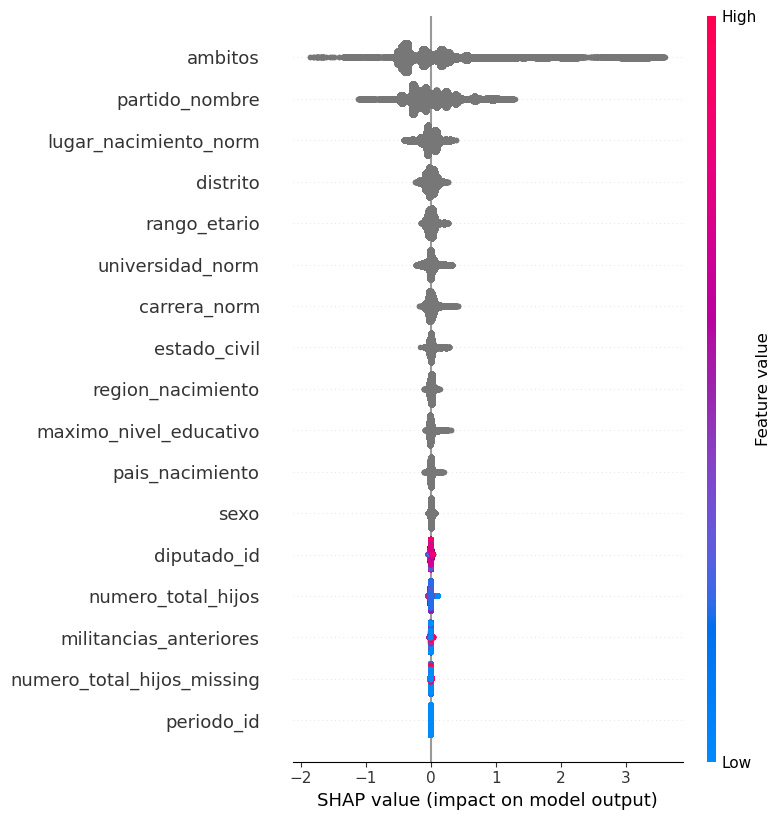

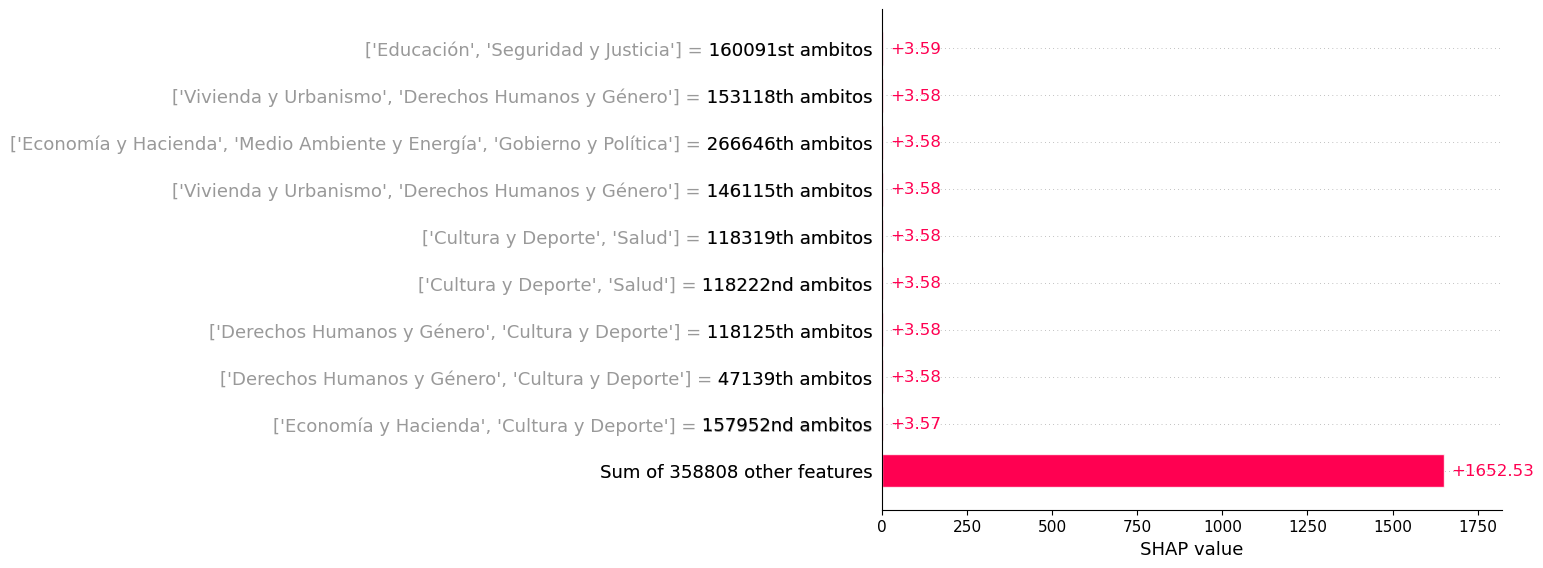

In [66]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X)

# resumen global de las variables
shap.summary_plot(shap_values, X)

# gráfico centrado solo en la variable 'ambitos'
shap.plots.bar(shap_values[:, "ambitos"])

In [88]:
rf_model = clf.named_steps['model']

In [89]:
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)
print(importances.head(20))  # top 20 variables

ValueError: Length of values (285) does not match length of index (297)

In [93]:
# Preprocessor ya ajustado
preprocessor_fitted = clf.named_steps['preprocess']

# Esta función maneja automáticamente pipelines internos y OneHotEncoder
feature_names = preprocessor_fitted.get_feature_names_out()
print(len(feature_names))
print(feature_names[:20])  # ejemplo de las primeras 20

285
['standardscaler__militancias_anteriores'
 'standardscaler__numero_total_hijos'
 'standardscaler__numero_total_hijos_missing'
 "onehotencoder__ambitos_['Cultura y Deporte', 'Derechos Humanos y Género']"
 "onehotencoder__ambitos_['Cultura y Deporte', 'Economía y Hacienda']"
 "onehotencoder__ambitos_['Cultura y Deporte', 'Gobierno y Política', 'Derechos Humanos y Género']"
 "onehotencoder__ambitos_['Cultura y Deporte', 'Gobierno y Política', 'Salud']"
 "onehotencoder__ambitos_['Cultura y Deporte', 'Relaciones Exteriores']"
 "onehotencoder__ambitos_['Cultura y Deporte', 'Salud']"
 "onehotencoder__ambitos_['Cultura y Deporte', 'Transporte y Telecomunicaciones', 'Gobierno y Política']"
 "onehotencoder__ambitos_['Cultura y Deporte']"
 "onehotencoder__ambitos_['Derechos Humanos y Género', 'Cultura y Deporte']"
 "onehotencoder__ambitos_['Derechos Humanos y Género', 'Gobierno y Política']"
 "onehotencoder__ambitos_['Derechos Humanos y Género', 'Medio Ambiente y Energía']"
 "onehotencoder__a

In [96]:
rf_model = clf.named_steps['model']
importances = pd.Series(rf_model.feature_importances_, index=feature_names)
importances = importances.sort_values(ascending=False)
print(importances.head(20))

onehotencoder__ambitos_['Economía y Hacienda', 'Gobierno y Política']            0.083978
onehotencoder__ambitos_['Economía y Hacienda']                                   0.070370
onehotencoder__partido_nombre_Partido Republicano                                0.045858
onehotencoder__ambitos_['no cumple']                                             0.035112
onehotencoder__partido_nombre_Partido Socialista                                 0.027851
onehotencoder__partido_nombre_Unión Demócrata Independiente                      0.024524
onehotencoder__ambitos_['Seguridad y Justicia']                                  0.019200
onehotencoder__ambitos_['Medio Ambiente y Energía']                              0.018839
onehotencoder__ambitos_['Gobierno y Política']                                   0.014763
standardscaler__numero_total_hijos                                               0.013213
onehotencoder__ambitos_['Trabajo y Previsión', 'Economía y Hacienda']            0.011973
onehotenco

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.8s finished


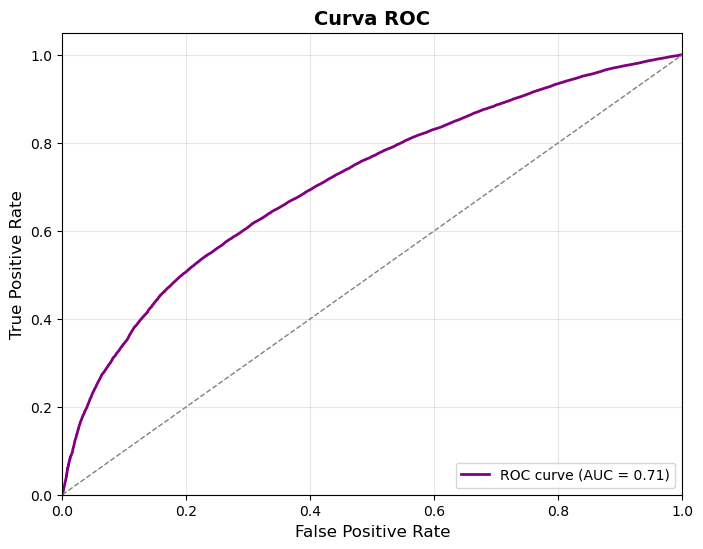

In [98]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

# Probabilidades para la clase positiva
y_score = clf.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Curva ROC', fontsize=14, weight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()